In [203]:
#import libraries
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import warnings 
#We do not want to see warnings
warnings.filterwarnings("ignore") 

In [204]:
df=pd.read_csv("uber.csv")

In [205]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [206]:
df.shape

(200000, 9)

In [207]:
df.drop(columns=['Unnamed: 0','key'],axis=1,inplace=True)

In [208]:
df.dropna(inplace=True)

In [215]:
df.shape

(199999, 9)

In [209]:
df['pickup_datetime']=pd.to_datetime(df["pickup_datetime"])

In [210]:
df['pickup_hour']=df["pickup_datetime"].dt.hour

In [211]:
df['pickup_minute']=df["pickup_datetime"].dt.minute

In [212]:
df['pickup_day']=df["pickup_datetime"].dt.dayofweek

In [213]:
df.drop(columns=['pickup_datetime'],axis=1,inplace=True)

In [216]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,52,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,22,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,47,3


In [217]:
valid_lat_mask = ((df['pickup_latitude'].between(-90, 90)) &
                  (df['dropoff_latitude'].between(-90, 90)))

In [218]:
df = df[valid_lat_mask]

In [219]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_day
fare_amount,1.000000,0.011021,-0.011562,0.011612,-0.012258,0.010157,-0.021461,-0.008042,0.007508
pickup_longitude,0.011021,1.000000,-0.923853,0.887204,-0.883844,-0.000682,0.001328,0.002644,0.001458
pickup_latitude,-0.011562,-0.923853,1.000000,-0.927311,0.958143,-0.000522,-0.001345,-0.002951,-0.004145
dropoff_longitude,0.011612,0.887204,-0.927311,1.000000,-0.969879,-0.000442,0.001146,0.002698,0.001881
dropoff_latitude,-0.012258,-0.883844,0.958143,-0.969879,1.000000,-0.001387,-0.001330,-0.002182,-0.003864
passenger_count,0.010157,-0.000682,-0.000522,-0.000442,-0.001387,1.000000,0.013179,0.000685,0.033189
pickup_hour,-0.021461,0.001328,-0.001345,0.001146,-0.001330,0.013179,1.000000,0.001150,-0.086943
pickup_minute,-0.008042,0.002644,-0.002951,0.002698,-0.002182,0.000685,0.001150,1.000000,-0.002318
pickup_day,0.007508,0.001458,-0.004145,0.001881,-0.003864,0.033189,-0.086943,-0.002318,1.000000


In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [221]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.25)
q_hi  = df["fare_amount"].quantile(0.75)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9ccb7a190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9ccb7a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9cf29ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9ccb7acd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9ccb7afa0>],
 'means': []}

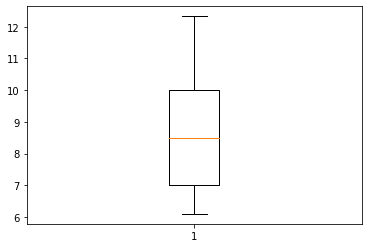

In [222]:
plt.boxplot(df['fare_amount'])

In [223]:
df.shape

(96237, 9)

In [224]:
X=df.drop(columns=['fare_amount'])
Y=df['fare_amount']

In [225]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [226]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
test_predict=lr.predict(X_test)
RMSE=np.sqrt(mean_squared_error(test_predict,Y_test))
print("RMSE: ",np.round_(RMSE,2))


RMSE:  1.72
